In [2]:
import pandas as pd
import os 
import numpy as np
diretorio = os.getcwd()

# Analisando notas em geral 

In [3]:
notas = pd.read_csv('ratings.csv')

del notas['timestamp']

notas

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [4]:
notas.columns = ['usuariosId', 'filmeId', 'notas']
notas

,usuariosId,filmeId,notas
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [5]:
notas['notas'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['notas'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: notas, dtype: int64

In [7]:
print('Media', notas['notas'].mean())

print('Mediana', notas['notas'].median())

Media 3.501556983616962
Mediana 3.5


In [8]:
notas.notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

<Axes: ylabel='Frequency'>

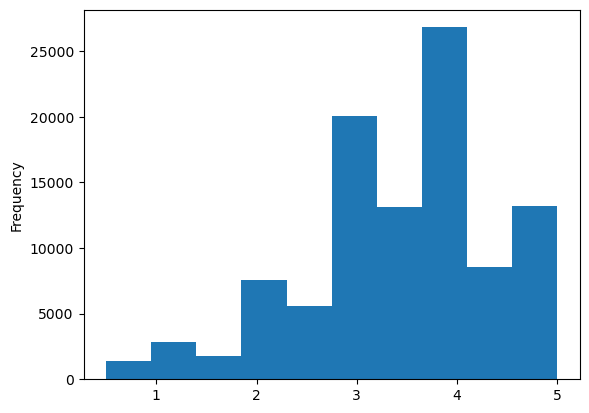

In [9]:
notas.notas.plot(kind= 'hist')

<Axes: >

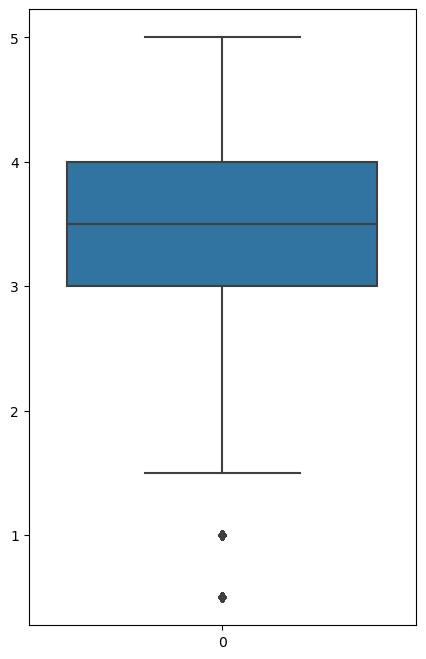

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (5,8))
sns.boxplot(notas.notas)

# DF dos Filmes 

In [11]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# Analisando algumas notas especificas por filme

In [12]:
#media de notas para Toy Story 1 
notas.query('filmeId==1').notas.mean()

3.9209302325581397

In [13]:
#media de notas de jumanji 
notas.query('filmeId==2').notas.mean()

3.4318181818181817

In [14]:
#tirando a media por filmes 
media_por_filme = notas.groupby('filmeId').mean().round(2).notas

In [15]:
media_por_filme

filmeId
1         3.92
2         3.43
3         3.26
4         2.36
5         3.07
          ... 
193581    4.00
193583    3.50
193585    3.50
193587    3.50
193609    4.00
Name: notas, Length: 9724, dtype: float64

<Axes: ylabel='Frequency'>

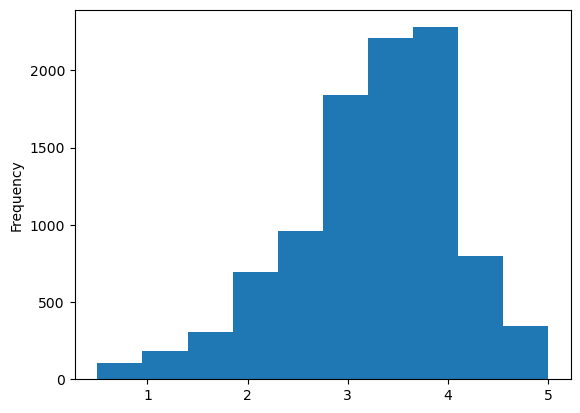

In [16]:
media_por_filme.plot(kind='hist')

In [17]:
media_por_filme.describe()

count    9724.000000
mean        3.262465
std         0.869896
min         0.500000
25%         2.800000
50%         3.420000
75%         3.910000
max         5.000000
Name: notas, dtype: float64

<Axes: xlabel='notas', ylabel='Count'>

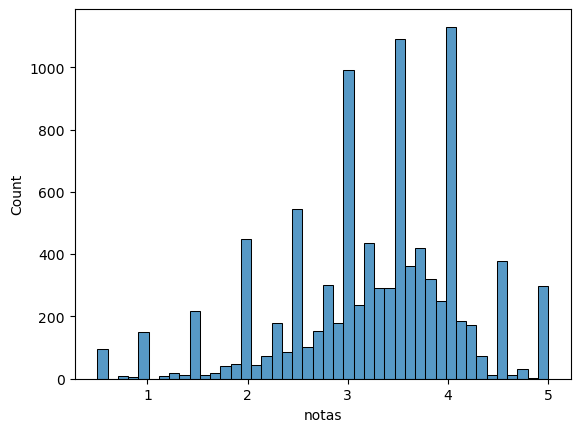

In [18]:
 sns.histplot(media_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos Filmes')

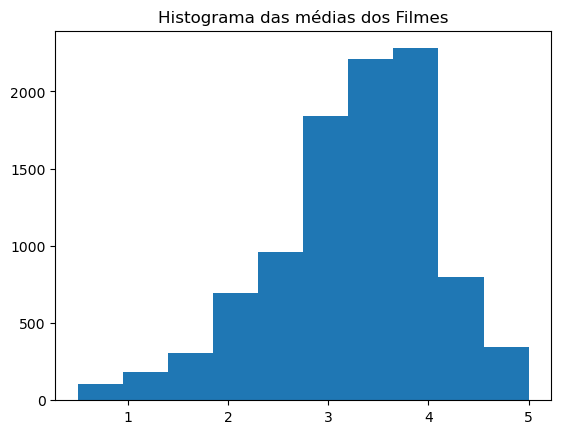

In [19]:
import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title('Histograma das médias dos Filmes')

# Analisando outro dataset

In [20]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [21]:
tmdb.original_language.unique() #categorica nominal 

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [22]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [23]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


<Axes: xlabel='original_language', ylabel='total'>

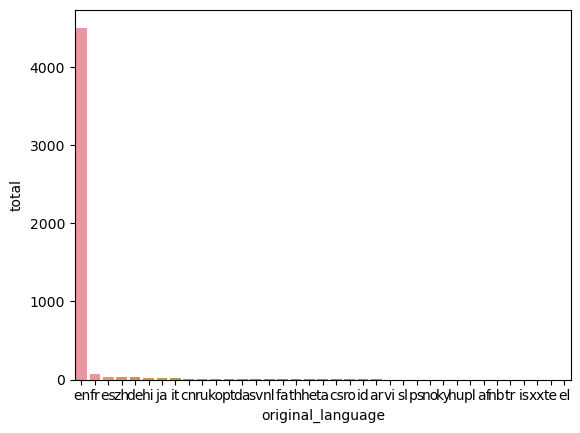

In [24]:
sns.barplot(x='original_language', y= 'total' ,data = contagem_de_lingua)

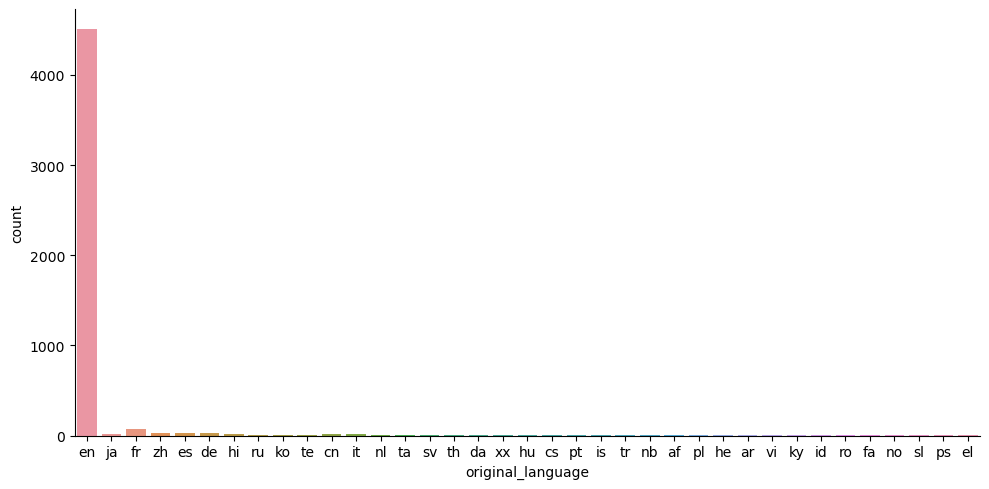

In [25]:
#maneira mais fácil, do que ter que criar toda um novo dataframe com categoria 
sns.catplot(x = 'original_language', kind= 'count' , data = tmdb,
           aspect= 2)


([<matplotlib.patches.Wedge at 0x14b272b00>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(1.

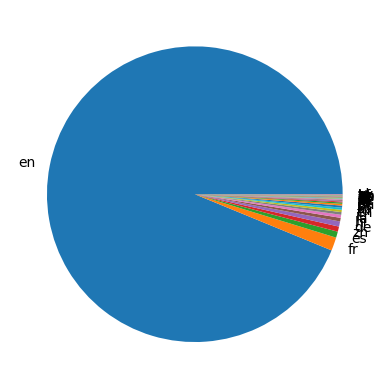

In [26]:
#horrivel para usar 
plt.pie(contagem_de_lingua['total'], labels =contagem_de_lingua['original_language'])

In [27]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles


<Axes: xlabel='lingua', ylabel='total'>

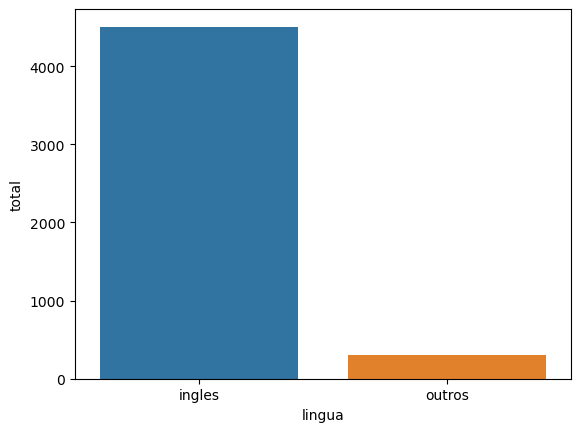

In [28]:
dados = {
    'lingua': ['ingles', 'outros'], 'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x= 'lingua', y= 'total', data= dados)

In [29]:
total_por_lingua_outros_filmes = tmdb.query('original_language != "en"').original_language.value_counts()
total_por_lingua_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

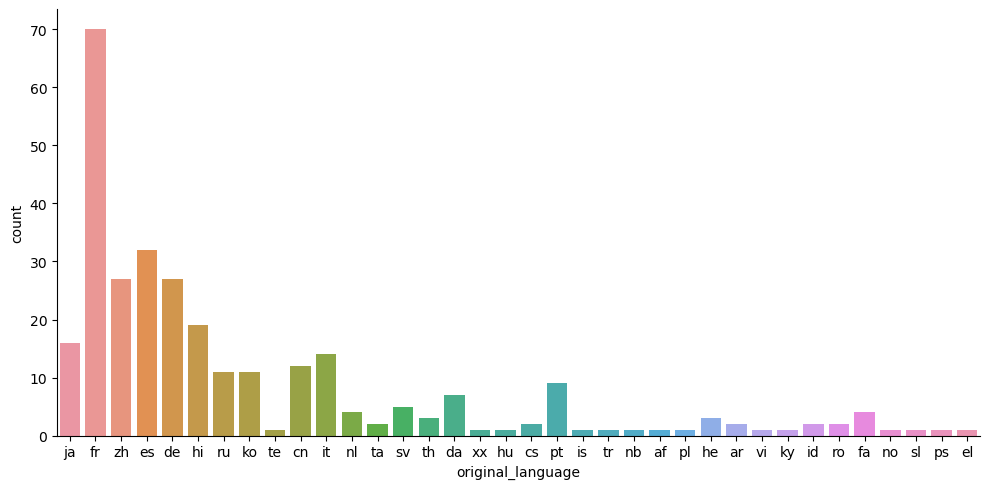

In [30]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')


sns.catplot(x = 'original_language', kind= 'count' , data = filmes_sem_lingua_original_em_ingles,
           aspect= 2)



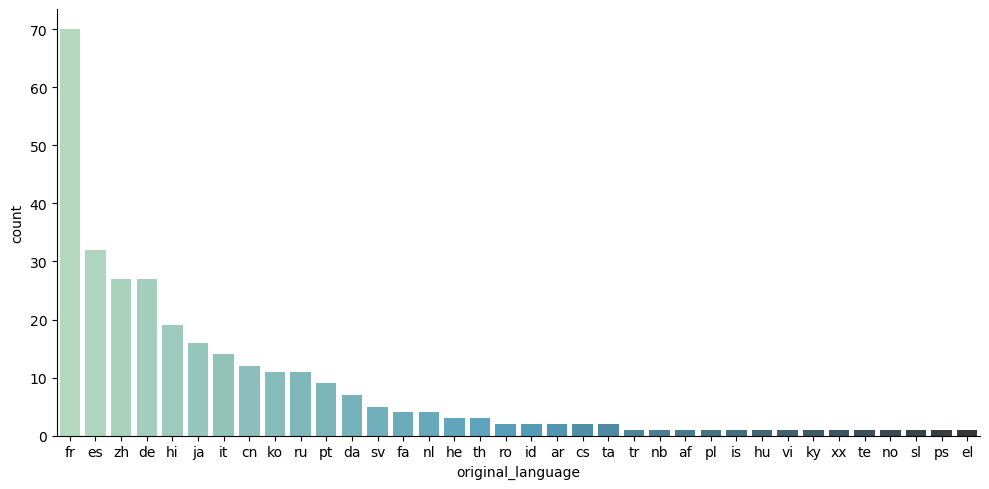

In [31]:

sns.catplot(x = 'original_language', kind= 'count' , data = filmes_sem_lingua_original_em_ingles,
           aspect= 2,
            palette="GnBu_d",
            order= total_por_lingua_outros_filmes.index)


import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

## Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma

In [32]:
display(filmes)
display(notas)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


,usuariosId,filmeId,notas
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [33]:
notas_toys_tory = notas.query('filmeId==1')
notas_jumanji = notas.query('filmeId==2')
print(len(notas_toys_tory), len(notas_jumanji))


215 110


In [34]:
print(f'Nota média do Toy Story {notas_toys_tory.notas.mean().round(2)}')
print(f'Nota média do Jumanji {notas_jumanji.notas.mean().round(2)}')

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [38]:
print(f'Nota mediana do Toy Story {notas_toys_tory.notas.median()}')
print(f'Nota mediana do Jumanji {notas_jumanji.notas.median()}')

Nota mediana do Toy Story 4.0
Nota mediana do Jumanji 3.5


In [39]:

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [40]:
filme1.mean()

3.0

In [41]:
filme2.mean()

3.0

In [42]:
np.median(filme1)

3.0

In [43]:
np.median(filme2)

3.0

/var/folders/rq/xwxzx3l97fj2k8x602q5_g0r0000gn/T/ipykernel_83946/1445260275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme1)


<Axes: ylabel='Density'>

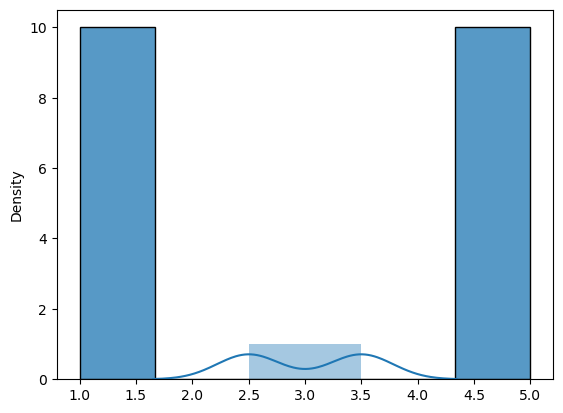

In [48]:
sns.distplot(filme1)
sns.histplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

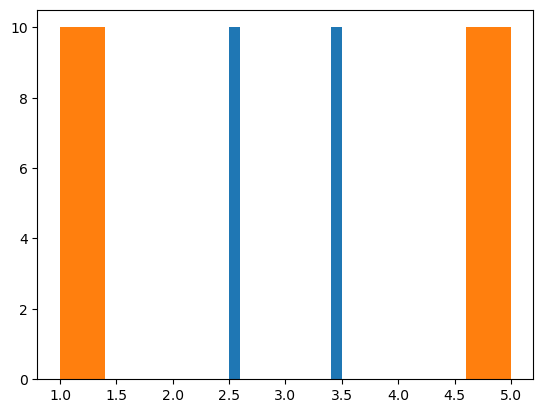

In [45]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x14b772bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x14b773130>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b772950>,
 'medians': [<matplotlib.lines.Line2D at 0x14b773670>,
 'fliers': [<matplotlib.lines.Line2D at 0x14b773910>,
 'means': []}

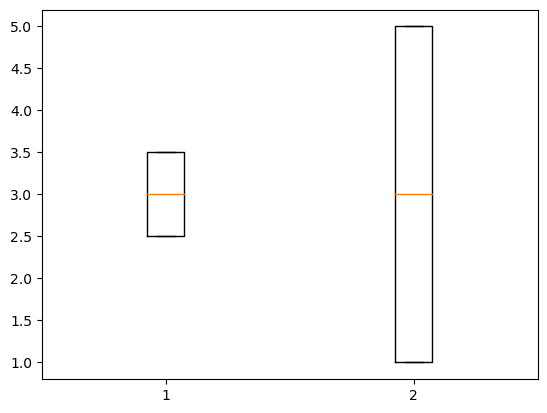

In [46]:
plt.boxplot([filme1, filme2])

In [ ]:
plt.boxplot(notas_jumanji.notas)

In [ ]:
plt.boxplot(notas_toys_tory.notas)

In [ ]:
plt.boxplot([notas_toys_tory.notas, notas_jumanji.notas])


In [ ]:
sns.boxplot(x ='filmeId', y='notas', data=notas.query('filmeId in [1, 2, 3, 4, 5]'))

In [ ]:
print(notas_jumanji.notas.std(), notas_toys_tory.notas.std())